In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

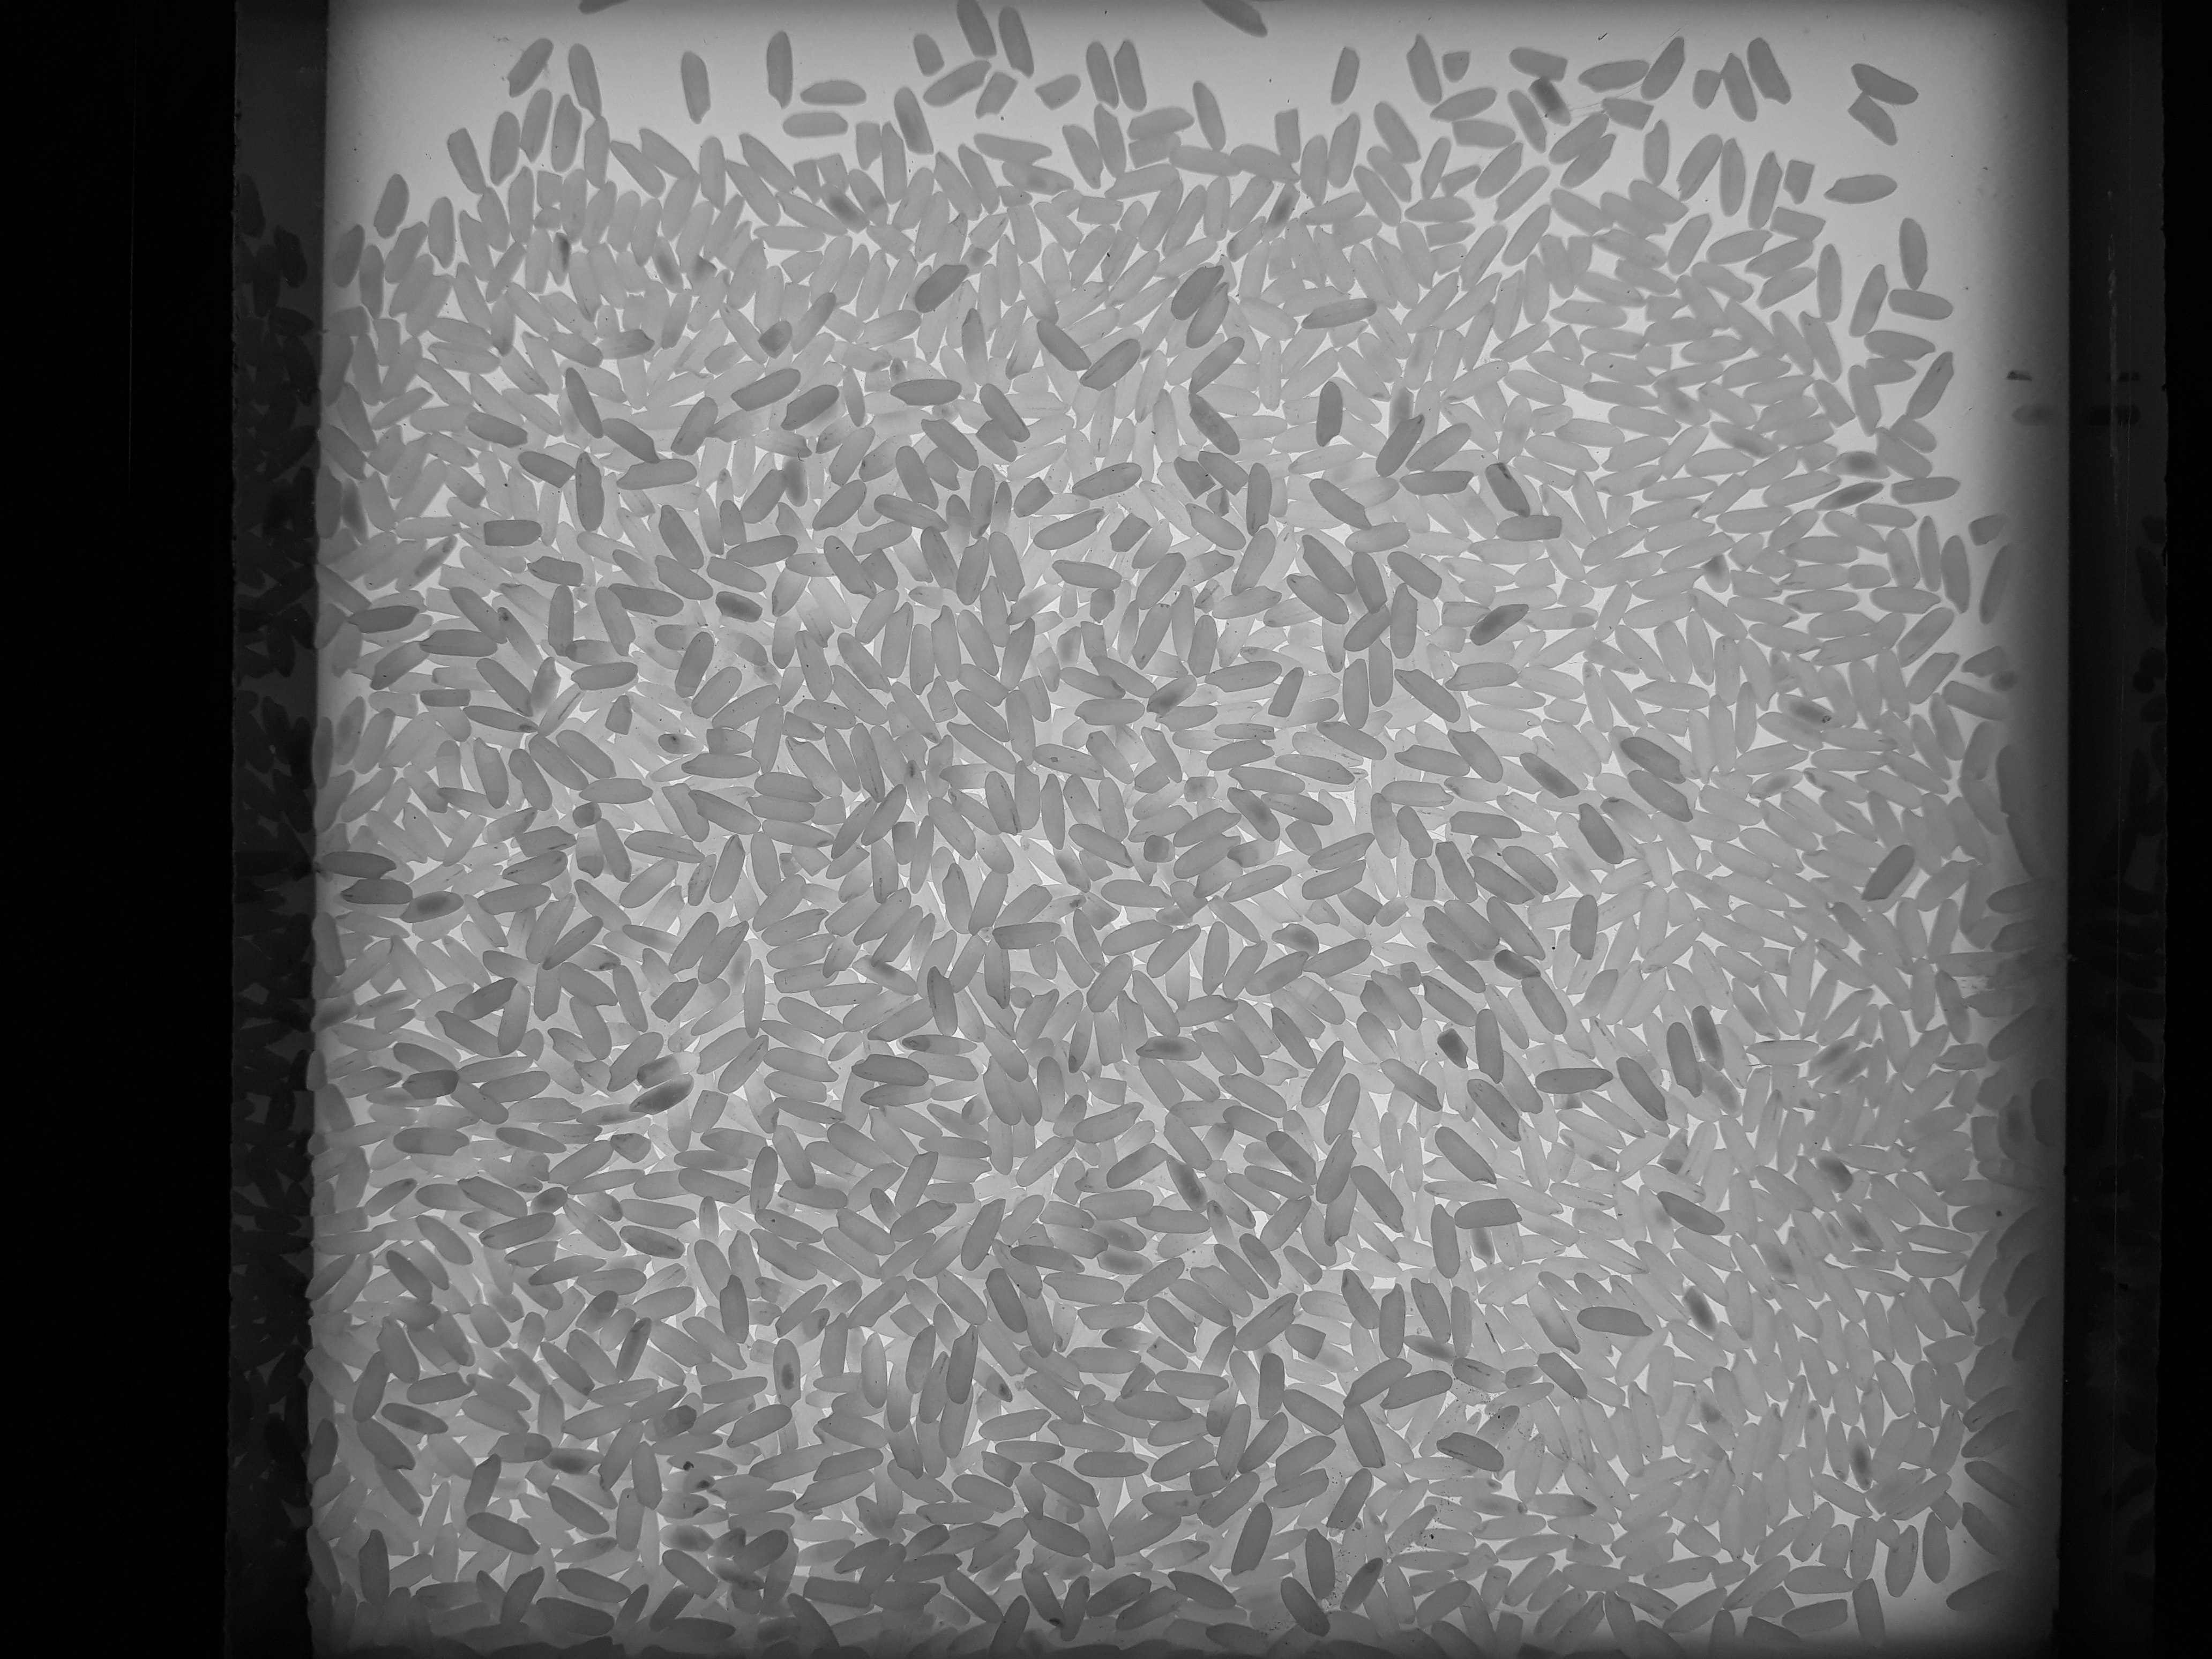

In [2]:
# Download image from https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/H14_093304.jpg
img = Image.open('H14_093304.jpg').convert('L')
img

In [3]:
img.size

(4128, 3096)

In [4]:
w, h = (np.array(img.size) / 2).astype('int')
w, h

(2064, 1548)

In [5]:
cw, ch = 660, 660

box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2  # left, upper, right, lower
box

(702, 444, 1362, 1104)

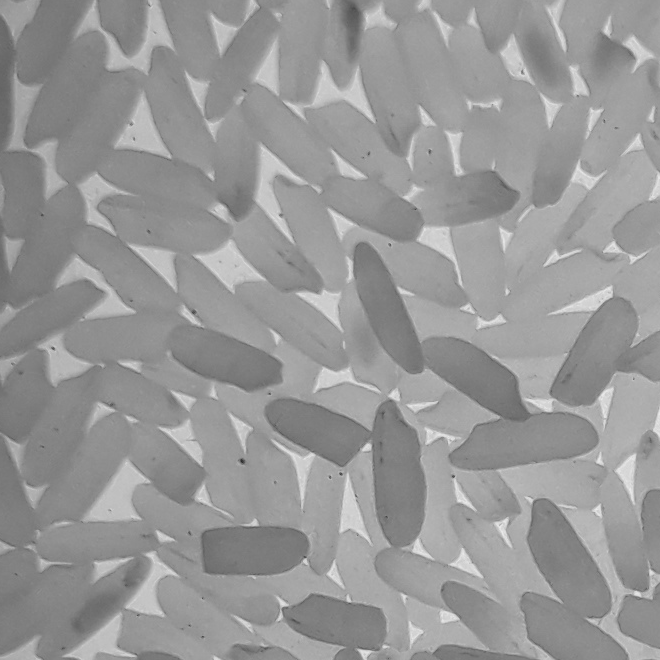

In [6]:
img_cropped = img.crop(box)
img_cropped

In [7]:
img_cropped.size

(660, 660)

0.227979274611399

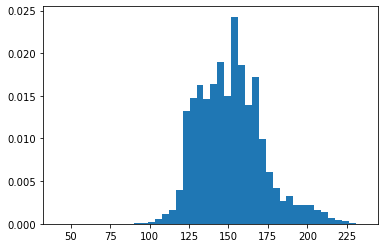

In [8]:
pixels = np.array(img_cropped).flatten()

h = plt.hist(pixels, bins=44, density=True)
h[0].sum()

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)
data.head()

0    1    2         3    4         5         6         7         8  \
0  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
4  0.0  0.0  0.0  0.000009  0.0  0.000009  0.000027  0.000018  0.000045   

         9  ...        35        36        37        38        39        40  \
0  0.00000  ...  0.012158  0.044333  0.354619  0.098181  0.124926  0.136753   
1  0.00000  ...  0.014039  0.018889  0.141064  0.151785  0.089501  0.119041   
2  0.00000  ...  0.018064  0.023848  0.141680  0.120306  0.108169  0.121783   
3  0.00000  ...  0.029847  0.022650  0.035885  0.074686  0.087595  0.107312   
4  0.00009  ...  0.015860  0.043084  0.339896  0.143472  0.115284  0.128973   

         41        42        43  humidity  
0  0.008118  0.000009  0.000000        10  
1  0.040481  0.001417  0.000000        10  
2  0.027558  0.000676  0.000000        10  
3  0.082734  0.014666  0.000054        10  
4  0.035604  0.001162  0.000000        10  

[5 rows x 45 columns]

In [10]:
data.iloc[:,:-1].describe()

0           1           2           3           4           5  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     0.000014    0.000028    0.000065    0.000128    0.000214    0.000966   
std      0.000114    0.000201    0.000394    0.000689    0.001124    0.007024   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.001474    0.002317    0.003440    0.004835    0.009255    0.090649   

                6           7           8           9  ...          34  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000   
mean     0.005213    0.001067    0.000116    0.000171  ...    0.027661   
std      0.035924    0.006590    0.000315    0.000339  ...    0.023420   
min      0.000000    0.000000    0.000000    0.000000  ...    0.007444   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.012980   
50%      0.000000    0.000000    0.000000    0.000015  ...    0.020033   
75%      0.000000    0.000033    0.000081    0.000188  ...    0.028884   
max      0.377729    0.075797    0.002356    0.001916  ...    0.141751   

               35          36          37          38          39          40  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     0.031278    0.087876    0.190515    0.112837    0.103457    0.116627   
std      0.031301    0.091787    0.095035    0.032029    0.020023    0.048207   
min      0.007756    0.011540    0.028937    0.037259    0.043105    0.007829   
25%      0.014053    0.027827    0.125638    0.089162    0.090107    0.082844   
50%      0.019908    0.046835    0.171026    0.108850    0.102421    0.123879   
75%      0.037133    0.108597    0.247400    0.133112    0.114255    0.151436   
max      0.253941    0.415862    0.537803    0.236872    0.181483    0.234865   

               41          42          43  
count  218.000000  218.000000  218.000000  
mean     0.032822    0.001430    0.000002  
std      0.023983    0.002411    0.000012  
min      0.000086    0.000000    0.000000  
25%      0.010775    0.000047    0.000000  
50%      0.030658    0.000638    0.000000  
75%      0.049145    0.001721    0.000000  
max      0.116686    0.018232    0.000134  

[8 rows x 44 columns]

<AxesSubplot:>

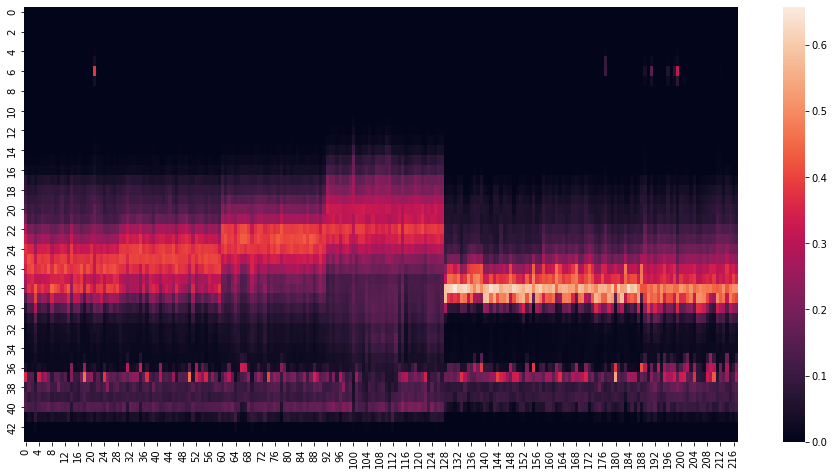

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(data.iloc[:,0:-1].T)

<BarContainer object of 7 artists>

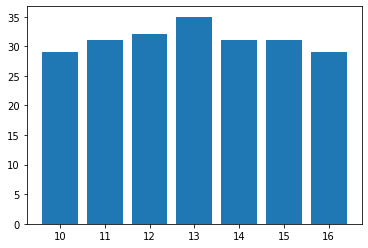

In [12]:
plt.bar(*np.unique(data.iloc[:,-1], return_counts=True))

<AxesSubplot:xlabel='humidity', ylabel='22'>

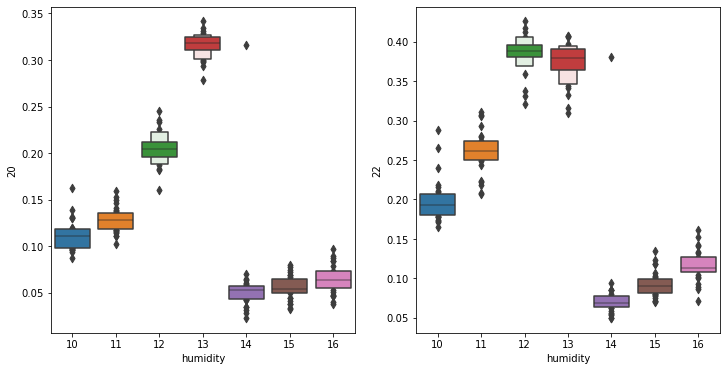

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxenplot(data=data, x='humidity', y='20')
plt.subplot(1,2,2)
sns.boxenplot(data=data, x='humidity', y='22')

<AxesSubplot:xlabel='22', ylabel='Density'>

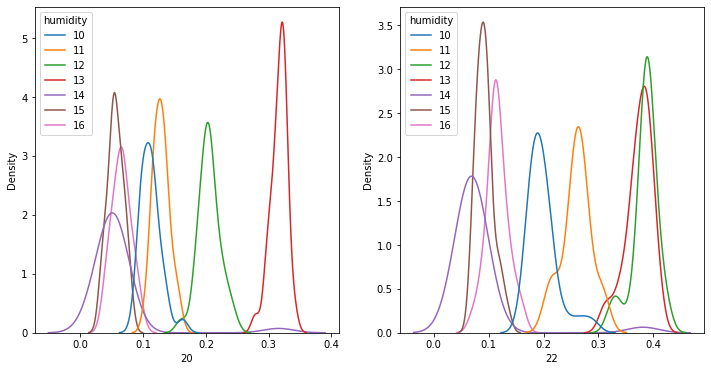

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(data=data, hue='humidity', x='20')
plt.subplot(1,2,2)
sns.kdeplot(data=data, hue='humidity', x='22')

<AxesSubplot:xlabel='20', ylabel='22'>

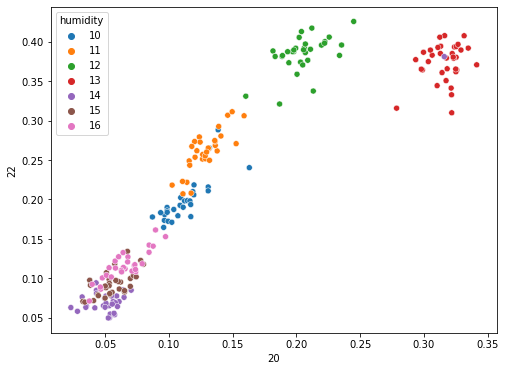

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='20', y='22', hue='humidity')